# Draw Temp profile for a given R

In [ ]:
Time      = list(Time)
density   = 5e-18
time_axis = list(np.unique(Time))

In [ ]:
temp_axis = []
index     = 0


for t in time_axis:
    epsilon     = 10**30
    while (t == Time[index]) and (index< (len(Time)-1)):
        if abs(dens[index]-density)<epsilon:
            epsilon = abs(dens[index]-density)
            temperature = Temp[index]
        index+=1
    #print(temperature, index)
    temp_axis.append(temperature)


In [ ]:
temp_axis.remove(temp_axis[0])
time_axis.remove(time_axis[0])

In [ ]:
Temp_para = temperature_code(time_axis)
print(max(temp_axis))

In [ ]:
temp_axis

In [ ]:
ax, lw = asManyPlots(111, [time_axis, time_axis], [Temp_para, temp_axis], linestyle = ['-', '-'], plotFlag=[True, True], color =['darkseagreen', 'firebrick', 'steelblue'], 
                     markerSize = [0, 7], marker=[None, 'x'], linewidth = 2, 
                     xlabel='Time since merger (in days)', ylabel='Temperature (in K)', textsize = 14, tickSize=12, 
                     showLegend=True, label= ['Temperature from Kasliwal+ 2017', 'Temperature without black body assumptions'], 
                     legendTextSize =10)
#ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis_set_minor_locator(MultopleLocator())
#plt.savefig('temperature_profile_blue_photons.pdf', bbox_inches='tight')

# Draw Temperature Profile for a given time

In [ ]:
2**(1/4) * 6852.07

In [ ]:
dens_axis = []
temp_axis = []
t = 108000/(24*3600)
for i in range(len(Time)):
    if Time[i] == t:
        dens_axis.append(dens[i])
        temp_axis.append(Temp[i])



In [ ]:
t

In [ ]:
ax, lw = asManyPlots(111, [temp_axis], [dens_axis], linestyle = ['None'], plotFlag=[True], marker ='+',
                     markerSize = [7], linewidth = 2, 
                     xlabel='Temperature', ylabel='Density', textsize = 14, tickSize=12) 
                     #showLegend=True, label= ['vphot for the lanthanide rich'])
                                              
                     
#ax.xaxis.set_minor_locator(MultipleLocator(1))
#plt.savefig('vphot_blue_photons.pdf', bbox_inches='tight')

## New temperature model

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statistics 
from plotUtilities import asManyPlots


c     = 2.99792458*10**(10)
sigma = 5.6704*10**(-5) 
Day     = 86400

filename2 ='temp_profile_test.txt'
filename  = 'temp_profile_mej0.05.txt'
#filenergy = 'energy_deposition_M0.05_v0.3.txt'
t_0 = 1*Day

R       = 0.3*c*1*Day
nb_cell = 100
step    = 2*R/(nb_cell)

#rho_0 = 7.21705*10**(-46)  # density scaled at r=r_0
#r_0   =  1.33245*10**(15) # radius at 1 day of a certain grid 
a = 1.707325420302365e+30 
#1.33921e-14 5.03294e+14 

radius = np.arange(0.5, R, step) 
time   = np.arange(0.5, 15, 0.5) * Day
dens   = np.zeros((len(radius),len(time))) 

#time_energy    = np.genfromtxt(filenergy, dtype ='float', skip_header=1, usecols=0)
#eps_therma     = np.genfromtxt(filenergy, dtype ='float', skip_header =1, usecols=(1))
#rate_radiation = np.genfromtxt(filenergy, dtype ='float', skip_header=1, usecols=2)
#Nstep_data     = int(np.genfromtxt(filenergy, dtype ='float', skip_header =0, usecols=0, max_rows=1))
#delta_time_data= (time_energy[Nstep_data-1] - time_energy[0])/(Nstep_data-1)
#Em     = np.unique((np.genfromtxt(filename2, dtype ='float', usecols =(2))))[::-1]

Temp_possis = np.genfromtxt(filename, dtype='float', usecols=1) 
time_possis = np.genfromtxt(filename, dtype='float', usecols=0) 
#tau_possis  = np.genfromtxt(filename, dtype='float', usecols=3) 
#radius1 = radius1 * R
dens1  = []

T0    = 5000
alpha = -0.4
t0    = 1.5 *Day# in day 

def temperature_code(Time):
    temp =[]
    for t in Time: 
        T = T0*(t/t0)**alpha
        temp.append(T)
    return temp

def temperature(Em, dens):
    u = Em * dens 
    temp = (c*u/(4*sigma))**(0.25)
    return temp


#def search_index(t):
#    index  = 0
#    minimum= 1*10**30
#    for i in range(Nstep_data):
#        if abs(t-time_energy[i])< minimum:
#            index = i
#            minimum = abs(t-time_energy[i])
#    return index 

#index1 = search_index(0)
#index2 = search_index(time[0])

Em_0   = 0
#for i in range(index1, index2):
#    Em_0 += eps_therma[i]*rate_radiation[i] * delta_time_data
    
#def energy_mass(t, index2):  # for t>0.5
#    Em = Em_0
#    index = search_index(t)
#    for i in range(index2, index):
#        Em+= eps_therma[i]*rate_radiation[i] * delta_time_data
#    return Em 
#radius1 = 0.01 * c * time

In [5]:
for i in range(len(radius)):
    rho_initial = (radius[i])**(-3) * a#rho_0*r_0**3 # at 1 day 
    #dens[i]     = rho_initial
    for t in range(len(time)):
        dens[i,t]= rho_initial *(t_0/time[t])**3
        
#for i in range(len(radius1)):
#    rho = (radius1[i])**(-3) * a#rho_0*r_0**3
#    dens1.append(rho)

In [3]:
Em = []
for t in time:
    Em.append(energy_mass(t, index2))

In [7]:
temp_para = temperature_code(time)

Temp1 = temperature(Em, dens[1])
Temp2 = temperature(Em, dens[len(radius)-1])

#Temp_01    = temperature(Em, np.array(dens1))
#Temp_01_05 = temperature(Em_05, dens1)

ValueError: operands could not be broadcast together with shapes (30,) (29,) 

In [6]:
data = []
for t in time:
    r_t = []
    for i in range(len(time_possis)):
        if time_possis[i] == t:
            r_t.append(Temp_possis[i])
    data.append(r_t)
    
data_temp = []
temp_min  = []
temp_max  = []
for i in range(len(data)):
    mu = statistics.mean(data[i])
    data_temp.append(mu)
    temp_min.append(min(data[i]))
    temp_max.append(max(data[i]))
    


In [12]:
Em = Em[1:]


In [7]:
temp_para = temperature_code(time)



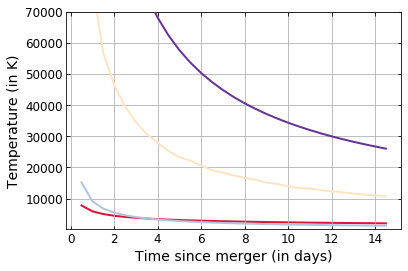

In [10]:
time = time * Day
ax, lw = asManyPlots(111, [time, time, time, time], [temp_para, data_temp, temp_min, temp_max],
                     plotFlag=[True,True, True, True, True, True, True], 
                     color =['crimson', 'bisque', 'lightsteelblue', 'rebeccapurple'], 
                     markerSize = [0, 0, 0, 0], linewidth = 2, linestyle =['-', '-', '-', '-'],
                     xlabel='Time since merger (in days)', ylabel='Temperature (in K)', textsize = 14, tickSize=12, 
                     #showLegend=True, 
                     #label= ['Temperature from Kasliwal+ 2017', 'Temperature at the center', 'Temperature at the outer region', 'Temperature from Possis'], 
                     legendTextSize =10, ylim=[100, 70000])
#plt.fill_between(time, Temp1, Temp2, color = 'rosybrown', alpha = 0.3)
#plt.savefig('vphot_blue_photons.pdf', bbox_inches='tight')

In [35]:
np.sqrt((7.692914e+14)**2 +(1.010181e+14)**2 +(3.885310e+13)**2)**(3) * 2.132843e-15


1.0000003273783822e+30

In [ ]:
#radius1 = np.array([0.052653210468106997,
 #0.6503761442848744,
 #0.9977296616585138,
 1.2537642861508373,
 1.4952919100672488,
 1.7244886361812497,
 1.8778729694003715,
 2.0753331791915803,
 2.31303888292363,
 2.4916350965457634,
 2.6859471138533957,
 2.839939022918915,
 3.0465631202677756,
 3.1851094117430923,
 3.40145005005005,
 3.568446285560923,
 3.7171055927195713,
 3.895540956391854,
 3.9670875986891034,
 4.152723876211834,
 4.329862490492877,
 4.497301937220261,
 4.668320889866466,
 4.939772836336722,
 5.04583763926023,
 5.216365842879891,
 5.223290878783144,
 5.328940978360243,
 5.171895195148428,
 5.222195254061449])#0.1*c *time